In [89]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline 

In [101]:
df_resale = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards_darius.csv")

In [4]:
df_resale.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,134296.000000,134296.000000,1.342960e+05
mean,97.767575,1995.328037,4.707863e+05
std,24.095410,13.602392,1.630103e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.500000e+05
50%,94.000000,1996.000000,4.400000e+05
75%,113.000000,2006.000000,5.550000e+05
max,249.000000,2019.000000,1.418000e+06


In [5]:
df_resale.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [6]:
print(df_resale.isnull().sum())
#No missing data

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64


In [7]:
df_resale.duplicated().value_counts()
#259/134037 is 0.19% , thus it does not affect the data that much. we can base the assumption that there are many hdb flats in one floor that sold at the same price

False    134037
True        259
dtype: int64

**Changing Column Month to Datetime from Object**

In [8]:
df_resale['month'] = pd.to_datetime(df_resale['month'])

In [9]:
df_resale['year_bought'] = df_resale['month'].dt.year
df_resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
134291,2022-08-01,YISHUN,EXECUTIVE,405,YISHUN AVE 6,04 TO 06,142.0,Apartment,1988,65 years 01 month,665000.0,2022
134292,2022-08-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,07 TO 09,146.0,Maisonette,1988,65 years 04 months,768888.0,2022
134293,2022-08-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,150.0,Maisonette,1988,65 years 04 months,778000.0,2022
134294,2022-08-01,YISHUN,EXECUTIVE,355,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,65 years 04 months,838000.0,2022


<font size="5">**Mean resale HDB price year on year**</font>

In [10]:
mean_by_year = df_resale.groupby(by = 'year_bought')[('resale_price')].mean()
print (round(mean_by_year))

year_bought
2017    443889.0
2018    441282.0
2019    432138.0
2020    452279.0
2021    511381.0
2022    544355.0
Name: resale_price, dtype: float64


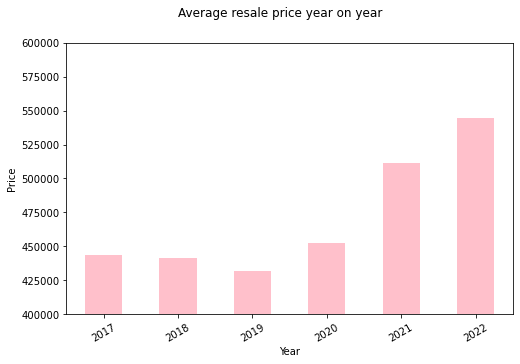

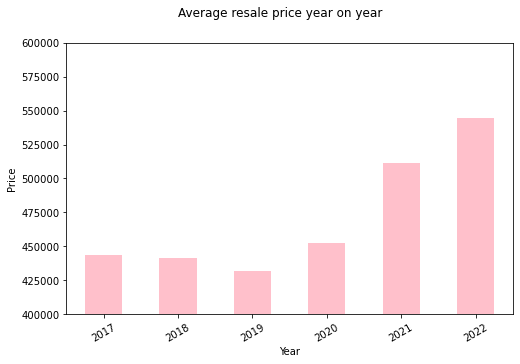

In [52]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
fig.suptitle("Average resale price year on year ")
mean_by_year.plot(kind="bar", x='year_bought', y='resale_price',color = 'pink', ax=ax0)
plt.xticks(rotation=30, horizontalalignment="center")
ax0.set_xlabel("Year")
ax0.set_ylabel("Price")
ax0.set_ylim([400000,600000])

fig




<font size="5">**The mean resale price of each region by year**</font>

In [11]:
print (df_resale['town'].unique())

print (df_resale['town'].nunique())


['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
26


In [12]:
#creating a list of conditions
#north region (3)
north = ['SEMBAWANG','WOODLANDS','YISHUN']

#north east region (5)
northeast = ['ANG MO KIO','PUNGGOL','SENGKANG','SERANGOON','HOUGANG']

#east region (3)
east = ['BEDOK','PASIR RIS','TAMPINES']

#west region (6)
west = ['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST']

#central region (9)
central = ['BISHAN','BUKIT MERAH','BUKIT TIMAH','CENTRAL AREA','GEYLANG','KALLANG/WHAMPOA','MARINE PARADE','TOA PAYOH','QUEENSTOWN']



In [13]:
town_list = df_resale.town.tolist()

In [14]:
region_list = []
for x in town_list:
    for northarea in north:
        if x == northarea:
            region_list.append('North')
            break

    for northeastarea in northeast:
        if x == northeastarea:
            region_list.append('North East')
            break

    for eastarea in east:
        if x == eastarea:
            region_list.append('East')
            break
    
    for westarea in west:
        if x == westarea:
            region_list.append('West')
            break

    for centralarea in central:
        if x == centralarea:
            region_list.append('Central')
            break


In [15]:
df_resale['region'] = region_list
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [16]:
#sort by region to find out the mean resale price
mean_byregion = df_resale.groupby('region')['resale_price'].mean()
mean_byregion

region
Central       557746.245959
East          482068.983324
North         405715.490159
North East    469530.967851
West          437437.540622
Name: resale_price, dtype: float64

<AxesSubplot:title={'center':'The percentage of mean resale price by region from 2017 to 2022'}, ylabel='resale_price'>

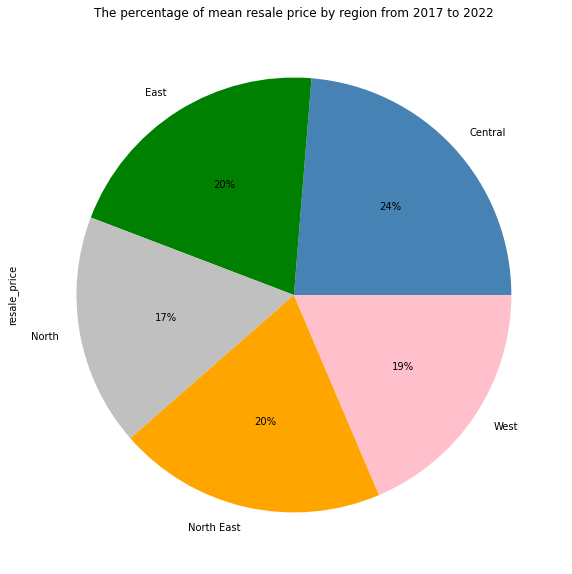

In [49]:
mean_byregion.plot(kind='pie', y='region', autopct='%1.0f%%', colors= ['steelblue', 'green','silver','orange','pink'],
title = 'The percentage of mean resale price by region from 2017 to 2022', figsize=(10,10))            

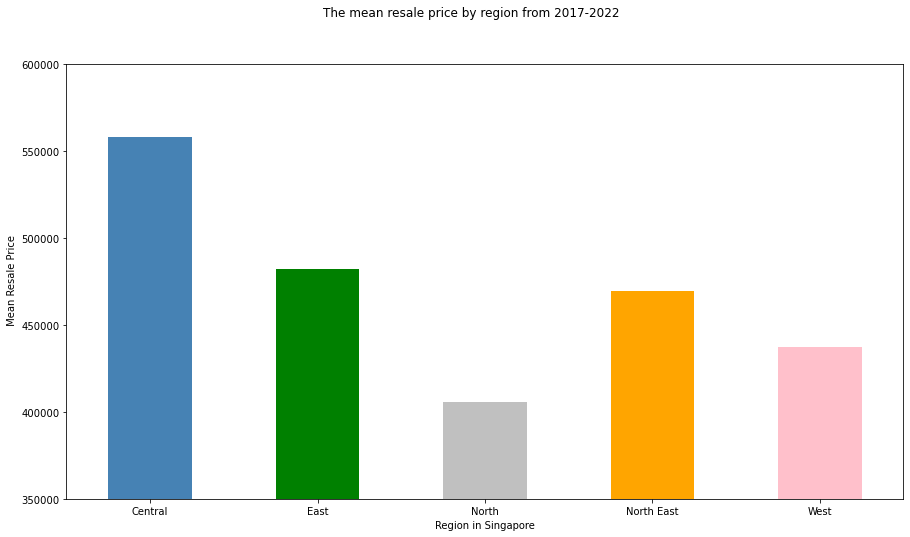

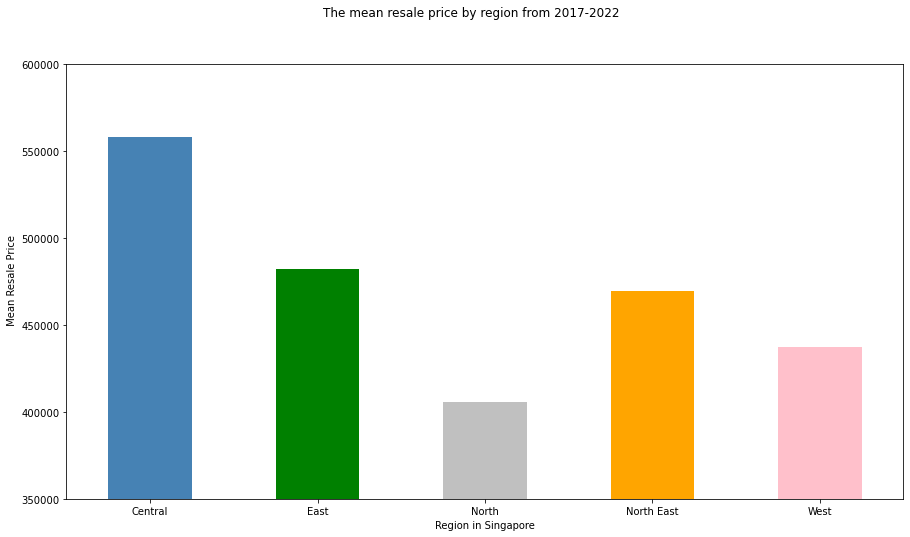

In [17]:
fig, ax = plt.subplots(nrows =1, ncols= 1, figsize=(15,8))

fig.suptitle("The mean resale price by region from 2017-2022")

#Adding the plot
mean_byregion.plot(kind='bar', x='region', y='resale_price', color= ['steelblue', 'green','silver','orange','pink'], ax=ax)

#Update axes features.  Make the x axis go from 400k to 700k.
ax.set(title = "", xlabel="Region in Singapore", ylabel= " Mean Resale Price")
plt.xticks(rotation=0, horizontalalignment="center")
ax.set_ylim([350000,600000])

fig




<font size="5">**The mean resale price of each town by year**</font>

In [18]:
avg_yearbytown = df_resale.groupby(['year_bought','town'])['resale_price'].mean()
avg_yearbytown

year_bought  town       
2017         ANG MO KIO     422493.497877
             BEDOK          421682.695122
             BISHAN         659286.311659
             BUKIT BATOK    379646.233696
             BUKIT MERAH    564494.190446
                                ...      
2022         SERANGOON      590172.116596
             TAMPINES       565231.268248
             TOA PAYOH      571152.429840
             WOODLANDS      509004.205430
             YISHUN         477134.055890
Name: resale_price, Length: 156, dtype: float64



<font size="5">**The mean resale price by location**</font>

In [19]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [20]:
avg_pricebyloc = df_resale.groupby(['town'])['resale_price'].mean()
print(round(avg_pricebyloc,0))

#Central area are places like marina, rochor that are not listed in the excel sheet.

town
ANG MO KIO         427945.0
BEDOK              434694.0
BISHAN             655935.0
BUKIT BATOK        414427.0
BUKIT MERAH        583136.0
BUKIT PANJANG      453890.0
BUKIT TIMAH        714664.0
CENTRAL AREA       653729.0
CHOA CHU KANG      435097.0
CLEMENTI           508599.0
GEYLANG            457705.0
HOUGANG            465406.0
JURONG EAST        438597.0
JURONG WEST        415918.0
KALLANG/WHAMPOA    529753.0
MARINE PARADE      533649.0
PASIR RIS          527281.0
PUNGGOL            485589.0
QUEENSTOWN         596932.0
SEMBAWANG          413801.0
SENGKANG           468939.0
SERANGOON          513635.0
TAMPINES           499387.0
TOA PAYOH          503046.0
WOODLANDS          411853.0
YISHUN             396724.0
Name: resale_price, dtype: float64


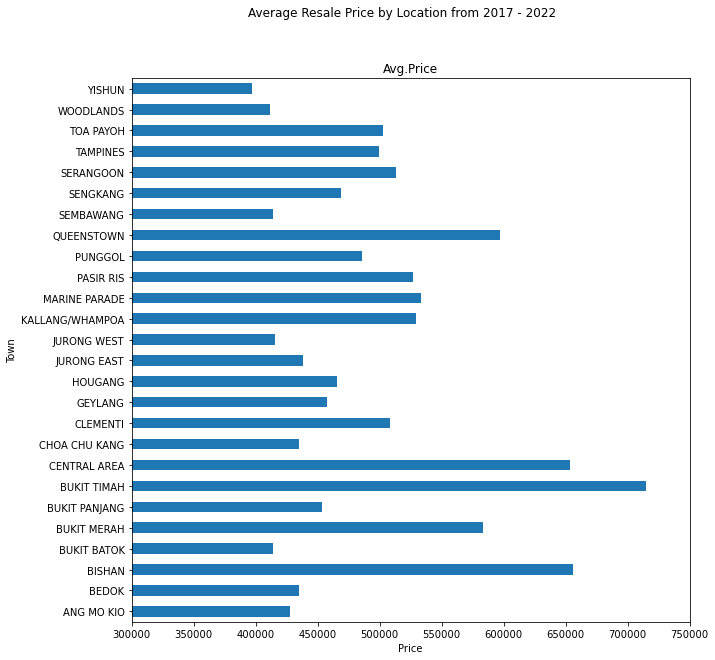

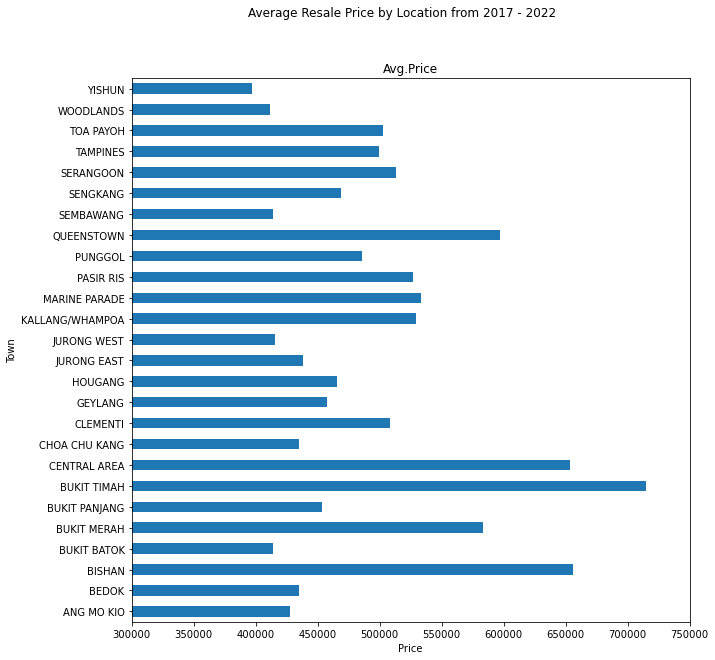

In [21]:
#creating a 1x1 figure, with figure size of (10,10)
fig, (ax0) = plt.subplots(nrows=1, ncols= 1, figsize = (10,10))

fig.suptitle("Average Resale Price by Location from 2017 - 2022")

#Adding the plot
avg_pricebyloc.plot(kind='barh', x = 'price', y='location', ax=ax0)

#Update axes features.  Make the x axis go from 400k to 700k.
ax0.set(title = "Avg.Price", xlabel="Price", ylabel= "Town")
ax0.set_xlim([300000,750000])

fig




<font size="5">**The % difference of HDB resale price between 2017-2019 and 2020-2022**</font>

In [22]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [23]:
df_1 = df_resale

In [100]:
a = df_1.query('year_bought >= 2017 and year_bought <= 2019')['resale_price'].count()
print (f'The total number of units sold from 2017-2019 is {a}')
b = df_1.query('year_bought >= 2020 and year_bought <= 2022')['resale_price'].count()
print (f'The total number of units sold from 2020-2022 is {b}')

The total number of units sold from 2017-2019 is 64256
The total number of units sold from 2020-2022 is 70040


In [98]:
list_1 = ['2017-2019','2020-2022']

fig = px.line(x=list_1,
             labels=dict(x="2017-2022", y='Amount of transacted units', color="Time Period"))
fig.add_bar(x=list_1, y=[64256,70040], name="Total amount of transacted units")
fig.show()

In [26]:
df_1.groupby('year_bought').resale_price.mean()

year_bought
2017    443888.520571
2018    441282.063703
2019    432137.912902
2020    452279.384971
2021    511381.239001
2022    544354.675770
Name: resale_price, dtype: float64

In [27]:
#Summation of all transaction from year 2017 - 2019
precov_price = df_1.query('year_bought >= 2017 and year_bought <= 2019')['resale_price'].sum()
print (round(precov_price,0))

#Summation of all transaction from year 2020 - YTD Aug 2022
durcov_price = df_1.query('year_bought >= 2020 and year_bought <= 2022')['resale_price'].sum()
print(round(durcov_price,0))

#Percentage increase between 2017-2019 to 2020 - YTD Aug 2022
percent_increase = ((durcov_price - precov_price)/precov_price) *100
percent_increase


28205603980.0
35019110375.0


24.15656973986449

<font size="5">**Which flat type is popular when it comes to resale?**</font>

In [25]:
df_resale['flat_type'].nunique()

7

In [26]:
pop_flattype = df_resale['flat_type'].value_counts()
pop_flattype

4 ROOM              56043
5 ROOM              34190
3 ROOM              31362
EXECUTIVE           10582
2 ROOM               1997
MULTI-GENERATION       66
1 ROOM                 56
Name: flat_type, dtype: int64

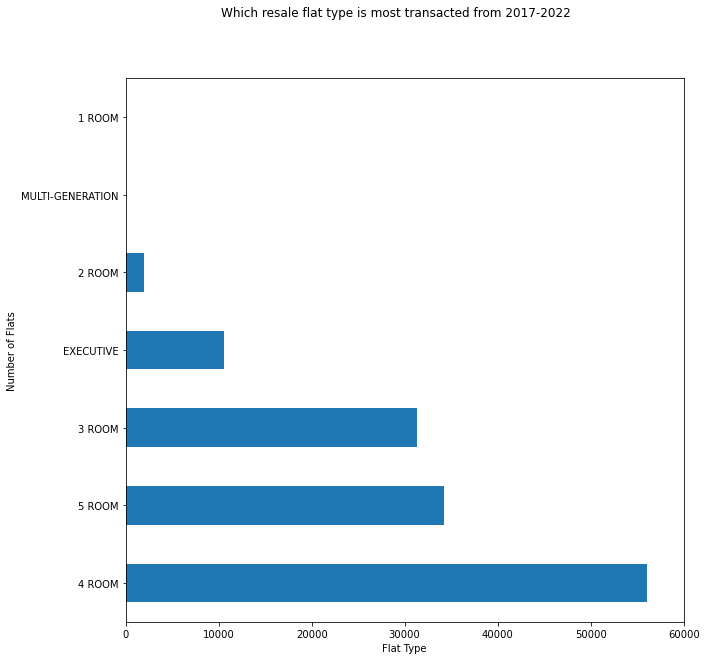

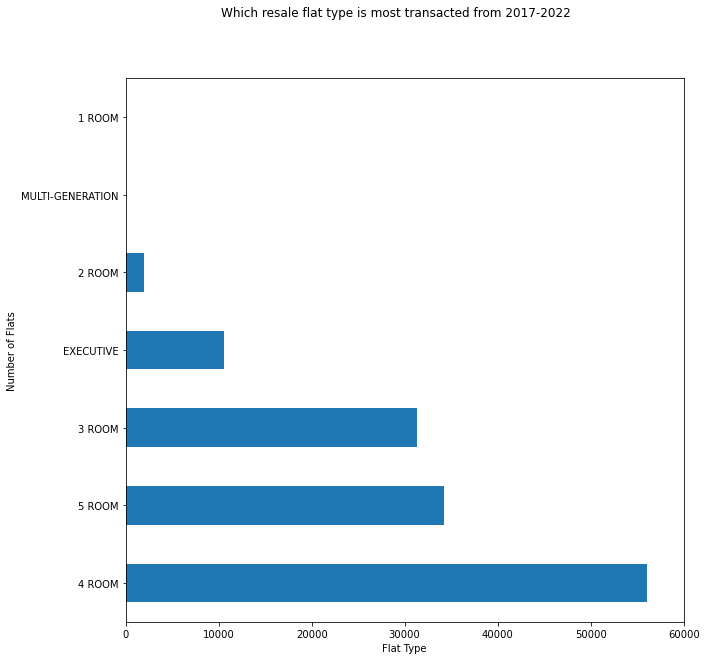

In [27]:
#creating a 1x1 figure, with figure size of (10,10)
fig, (ax0) = plt.subplots(nrows=1, ncols= 1, figsize = (10,10))

fig.suptitle("Which resale flat type is most transacted from 2017-2022")

#Adding the plot
pop_flattype.plot(kind='barh', x = 'flat_type', y='', ax=ax0)

#Update axes features.  Make the x axis go from 0 to 60,000.
ax0.set(title = "", xlabel="Flat Type", ylabel= "Number of Flats")
ax0.set_xlim([0,60000])

fig


<font size="5">**Is the difference in price between 3, 4 & 5 rooms significant during covid period (2020-2022)?**</font>

In [28]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [29]:
df_flatprice=df_resale.groupby(['year_bought','flat_type'])['resale_price'].sum()


In [30]:
df_flatprice

year_bought  flat_type       
2017         1 ROOM              1.808000e+06
             2 ROOM              5.263757e+07
             3 ROOM              1.604109e+09
             4 ROOM              3.760980e+09
             5 ROOM              2.662448e+09
             EXECUTIVE           1.018591e+09
             MULTI-GENERATION    3.135000e+06
2018         1 ROOM              1.657000e+06
             2 ROOM              6.742833e+07
             3 ROOM              1.568861e+09
             4 ROOM              3.786041e+09
             5 ROOM              2.895131e+09
             EXECUTIVE           1.183344e+09
             MULTI-GENERATION    1.202089e+07
2019         1 ROOM              1.934268e+06
             2 ROOM              9.461313e+07
             3 ROOM              1.623957e+09
             4 ROOM              3.965723e+09
             5 ROOM              2.859007e+09
             EXECUTIVE           1.030710e+09
             MULTI-GENERATION    1.146866e+07
2020

In [31]:
#The sum of 3 room resale price from 2020 - 2022 covid period 
three_rooms_covid = df_flatprice.reindex([(2020,"3 ROOM"), (2021,"3 ROOM"), (2022,"3 ROOM")]).sum()

#The sum of 4 room resale price from 2020 - 2022 covid period 
four_rooms_covid = df_flatprice.reindex([(2020,"4 ROOM"), (2021,"4 ROOM"), (2022,"4 ROOM")]).sum()

#The sum of 5 room resale price from 2020 - 2022 covid period 
five_rooms_covid = df_flatprice.reindex([(2020,"5 ROOM"), (2021,"5 ROOM"), (2022,"5 ROOM")]).sum()


In [ ]:
#Creating 3 room vs 4 rooms, 4 rooms vs 5 rooms, 3 rooms vs 5 rooms 

plt.style.use('seaborn-pastel')

fig,(ax0) = plt.subplots(nrow=1, ncol=1, figsize = (10,8))
fig.suptitle = ('Price of 3Rooms vs 4Rooms from 2020-2022')
#Adding the plot for 3room vs 4 rooms

three_rooms_covid.plot()


<font size="5">**The highest HDB resale transaction for each year**</font>

In [32]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [33]:
df_year_town = df_resale.groupby(['year_bought','town', 'flat_type'], as_index=False)['resale_price'].max()

df_highest = df_year_town.groupby(['year_bought'])['resale_price'].max()

#Mergeing the 2 df together
df_highest_year_town = pd.merge(df_highest, df_year_town, how="left", on=['year_bought', 'resale_price'])

df_highest_year_town

,year_bought,resale_price,town,flat_type
0,2017,1180000.0,BISHAN,5 ROOM
1,2018,1185000.0,KALLANG/WHAMPOA,3 ROOM
2,2019,1205000.0,KALLANG/WHAMPOA,5 ROOM
3,2020,1258000.0,CENTRAL AREA,5 ROOM
4,2021,1360000.0,BISHAN,5 ROOM
5,2022,1418000.0,QUEENSTOWN,5 ROOM


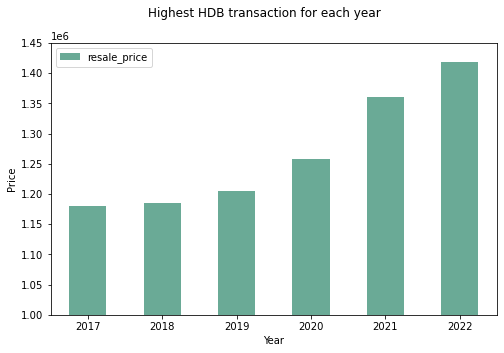

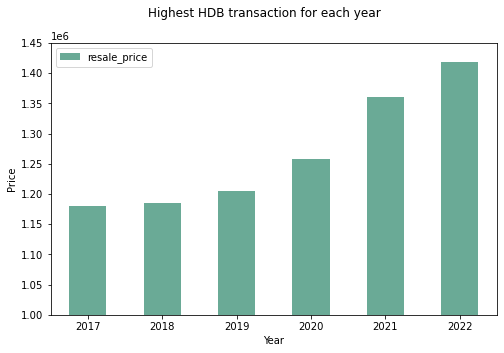

In [80]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
fig.suptitle("Highest HDB transaction for each year ")
df_highest_year_town.plot(kind="bar", x='year_bought', y='resale_price',color = '#6aaa96', ax=ax0)
plt.xticks(rotation=0, horizontalalignment="center")
ax0.set_xlabel("Year")
ax0.set_ylabel("Price")
ax0.set_ylim([1000000,1450000])

fig


<font size="5">**The lowest HDB resale transaction for each year**</font>

In [61]:
df_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_bought,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017,North East


In [70]:
#Note : Since Edison has a family, and min shows flat type from 1-3 rooms. a family of 4 will not be able to stay in this HDB. 4 room will be the best. 

df_4room = df_resale.loc[df_resale['flat_type'] == '4 ROOM', :]

df_year_town_low = df_4room.groupby(['year_bought','town', 'flat_type'], as_index=False)['resale_price'].min()

df_lowest = df_year_town_low.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town = pd.merge(df_lowest, df_year_town_low, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town

,year_bought,resale_price,town,flat_type
0,2017,263000.0,WOODLANDS,4 ROOM
1,2018,225000.0,WOODLANDS,4 ROOM
2,2019,230000.0,WOODLANDS,4 ROOM
3,2020,218000.0,WOODLANDS,4 ROOM
4,2021,250000.0,WOODLANDS,4 ROOM
5,2022,288000.0,YISHUN,4 ROOM


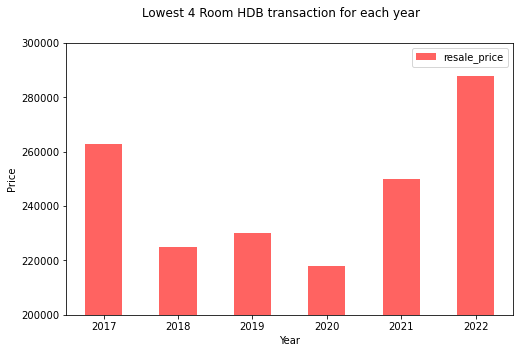

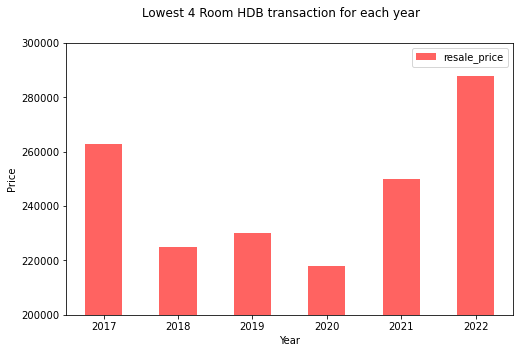

In [79]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8,5))
fig.suptitle("Lowest 4 Room HDB transaction for each year ")
df_lowest_year_town.plot(kind="bar", x='year_bought', y='resale_price',color = '#ff6361', ax=ax0)
plt.xticks(rotation=0, horizontalalignment="center")
ax0.set_xlabel("Year")
ax0.set_ylabel("Price")
ax0.set_ylim([200000,300000])

fig



<font size="5">**Finding out the cheapest transacted 4room in each region**</font>

In [82]:
#WEST REGION CHEAPEST TRANSACTED 4 ROOM FLATS FROM 2017-2022
df_4roomWest = df_resale.loc[(df_resale['flat_type'] == '4 ROOM') & (df_resale['region'] == 'West') , :]

df_year_town_low_west = df_4roomWest.groupby(['year_bought','town', 'flat_type','region'], as_index=False)['resale_price'].min()

df_lowest_west = df_year_town_low_west.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town_west = pd.merge(df_lowest_west, df_year_town_low_west, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town_west

,year_bought,resale_price,town,flat_type,region
0,2017,285000.0,BUKIT PANJANG,4 ROOM,West
1,2018,265000.0,CHOA CHU KANG,4 ROOM,West
2,2019,235000.0,BUKIT PANJANG,4 ROOM,West
3,2020,260000.0,BUKIT PANJANG,4 ROOM,West
4,2020,260000.0,JURONG EAST,4 ROOM,West
5,2021,300000.0,CHOA CHU KANG,4 ROOM,West
6,2022,350000.0,JURONG EAST,4 ROOM,West


In [84]:
#EAST REGION CHEAPEST TRANSACTED 4 ROOM FLATS FROM 2017-2022
df_4roomEast = df_resale.loc[(df_resale['flat_type'] == '4 ROOM') & (df_resale['region'] == 'East') , :]

df_year_town_low_east = df_4roomEast.groupby(['year_bought','town', 'flat_type','region'], as_index=False)['resale_price'].min()

df_lowest_east = df_year_town_low_east.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town_east = pd.merge(df_lowest_east, df_year_town_low_east, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town_east

,year_bought,resale_price,town,flat_type,region
0,2017,311000.0,PASIR RIS,4 ROOM,East
1,2018,300000.0,BEDOK,4 ROOM,East
2,2019,300000.0,BEDOK,4 ROOM,East
3,2020,250000.0,TAMPINES,4 ROOM,East
4,2021,328000.0,BEDOK,4 ROOM,East
5,2022,330000.0,TAMPINES,4 ROOM,East


In [86]:
#NORTHEAST REGION CHEAPEST TRANSACTED 4 ROOM FLATS FROM 2017-2022
df_4roomNE = df_resale.loc[(df_resale['flat_type'] == '4 ROOM') & (df_resale['region'] == 'North East') , :]

df_year_town_low_ne = df_4roomNE.groupby(['year_bought','town', 'flat_type','region'], as_index=False)['resale_price'].min()

df_lowest_ne = df_year_town_low_ne.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town_ne = pd.merge(df_lowest_ne, df_year_town_low_ne, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town_ne

,year_bought,resale_price,town,flat_type,region
0,2017,300000.0,HOUGANG,4 ROOM,North East
1,2017,300000.0,SERANGOON,4 ROOM,North East
2,2018,271000.0,SENGKANG,4 ROOM,North East
3,2019,275000.0,ANG MO KIO,4 ROOM,North East
4,2020,280000.0,HOUGANG,4 ROOM,North East
5,2021,300000.0,SENGKANG,4 ROOM,North East
6,2022,355000.0,ANG MO KIO,4 ROOM,North East


In [87]:
#CENTRAL REGION CHEAPEST TRANSACTED 4 ROOM FLATS FROM 2017-2022
df_4roomCentral = df_resale.loc[(df_resale['flat_type'] == '4 ROOM') & (df_resale['region'] == 'Central') , :]

df_year_town_low_central = df_4roomCentral.groupby(['year_bought','town', 'flat_type','region'], as_index=False)['resale_price'].min()

df_lowest_central = df_year_town_low_central.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town_central = pd.merge(df_lowest_central, df_year_town_low_central, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town_central

,year_bought,resale_price,town,flat_type,region
0,2017,302000.0,TOA PAYOH,4 ROOM,Central
1,2018,290000.0,TOA PAYOH,4 ROOM,Central
2,2019,275000.0,TOA PAYOH,4 ROOM,Central
3,2020,280000.0,TOA PAYOH,4 ROOM,Central
4,2021,293000.0,TOA PAYOH,4 ROOM,Central
5,2022,350000.0,BISHAN,4 ROOM,Central


In [88]:
#NORTH REGION CHEAPEST TRANSACTED 4 ROOM FLATS FROM 2017-2022
df_4roomNorth = df_resale.loc[(df_resale['flat_type'] == '4 ROOM') & (df_resale['region'] == 'North') , :]

df_year_town_low_north = df_4roomNorth.groupby(['year_bought','town', 'flat_type','region'], as_index=False)['resale_price'].min()

df_lowest_north = df_year_town_low_north.groupby(['year_bought'])['resale_price'].min()

#Mergeing the 2 df together
df_lowest_year_town_north = pd.merge(df_lowest_north, df_year_town_low_north, how="left", on=['year_bought', 'resale_price'])

df_lowest_year_town_north

,year_bought,resale_price,town,flat_type,region
0,2017,263000.0,WOODLANDS,4 ROOM,North
1,2018,225000.0,WOODLANDS,4 ROOM,North
2,2019,230000.0,WOODLANDS,4 ROOM,North
3,2020,218000.0,WOODLANDS,4 ROOM,North
4,2021,250000.0,WOODLANDS,4 ROOM,North
5,2022,288000.0,YISHUN,4 ROOM,North


In [95]:
region_list = ['West','East','North East', 'Central', 'North']

fig = px.line(x=region_list, y=[300000,300000,300000,300000,300000], color=px.Constant("Treshold"),
             labels=dict(x="2022", y='Resale Value', color="Time Period"))
fig.add_bar(x=region_list, y=[350000,330000,355000,350000,288000], name="2022 Cheapest 4 Room")
fig.show()